# **Stroke Prediction Using Machine Learning**

#### This project is an attempt to build a machine learning model to predict the chances of stroke to a user.
#### The model will consist of a front-end GUI for collecting data. Flask file to connect the model to backend model.
#### For the backend model we will be comparining 10 different ML algorithms for their accuracy. Select the best one and perform k-fold validation and hyper-parameter optimization on it.

### Contents
Here we will link every step that we took for selecting our backend model

# 0. Importing the Necessary Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import seaborn as sns; sns.set()
import graphviz 
import os
import preprocessing 
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud

from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings("ignore")

---

# 1. Importing and Exploring Dataset

In [2]:
import numpy as np
import pandas as pd
import os

for dirname, _, filenames in os.walk("C:\\Users\\msn21\\Desktop\\Major Project\\Stroke\\dataset\\"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
dataset = pd.read_csv('C:\\Users\\msn21\\Desktop\\Major Project\\Stroke-Local\\dataset\\healthcare-dataset-stroke-data.csv')
dataset.sample(10)

id  gender   age  hypertension  heart_disease ever_married work_type  \
4852  44155  Female  55.0             0              0          Yes  Govt_job   
341   38805  Female  37.0             0              0          Yes   Private   
2678  30678  Female  48.0             0              0          Yes   Private   
4886  60562  Female  21.0             0              0           No   Private   
4062  26330  Female  69.0             0              0          Yes   Private   
3909   4077    Male  49.0             0              0          Yes   Private   
1584   6372  Female  32.0             0              0          Yes   Private   
55    25831    Male  63.0             0              1          Yes   Private   
2956  66370  Female   5.0             0              0           No  children   
421     530  Female  12.0             0              0           No  children   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
4852          Urban              89.43  26.1  formerly smoked       0  
341           Rural              75.18  48.2  formerly smoked       0  
2678          Urban              77.99  31.2  formerly smoked       0  
4886          Rural              55.12  21.8     never smoked       0  
4062          Urban              91.65  25.7  formerly smoked       0  
3909          Urban             219.70  53.8          Unknown       0  
1584          Urban              97.14  55.9     never smoked       0  
55            Rural             196.71  36.5  formerly smoked       1  
2956          Rural              59.78  15.9          Unknown       0  
421           Rural              75.22  20.9          Unknown       0

### Dropping column 'id' as it can cause unwanted correlation.

In [4]:
dataset.drop("id", axis=1, inplace=True)

In [5]:
dataset.sample(5)

gender   age  hypertension  heart_disease ever_married      work_type  \
2837    Male  27.0             0              0          Yes        Private   
3247  Female  53.0             0              0          Yes        Private   
5058    Male  21.0             0              0           No        Private   
2373  Female  62.0             1              0          Yes  Self-employed   
2821  Female  71.0             0              1          Yes  Self-employed   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
2837          Urban              76.19  22.0     never smoked       0  
3247          Rural              90.65  22.1  formerly smoked       0  
5058          Rural              89.29  23.4     never smoked       0  
2373          Rural              74.32  34.0     never smoked       0  
2821          Rural              98.45  29.7          Unknown       0

## Variable Description

* id: unique identifier
* gender: "Male", "Female" or "Other"
* age: age of the patient
* hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* ever_married: "No" or "Yes"
* work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* Residence_type: "Rural" or "Urban"
* avg_glucose_level: average glucose level in blood
* bmi: body mass index
* smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* stroke: 1 if the patient had a stroke or 0 if not

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


#### We have null variables in 'bmi' column. We will handle them after.

<a id="4"></a> 
## Univariate Variable Analysis

* **Categorical Variables:** 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'

* **Numerical Variables:** 'id', 'hypertension', 'heart_disease', 'stroke'

<a id="5"></a> 
### Categorical Variables

In [7]:
def bar_plot(variable):
    # get feature
    var = dataset[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

In [8]:
categorical = (dataset.dtypes == "object")
categorical_list = list(categorical[categorical].index)

print("Categorical variables:")
print(categorical_list)

Categorical variables:
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


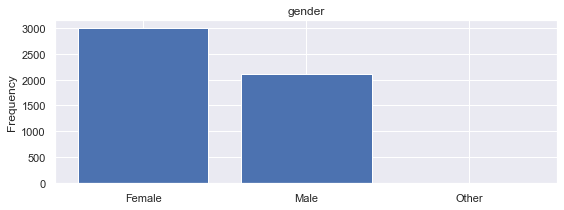

gender:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


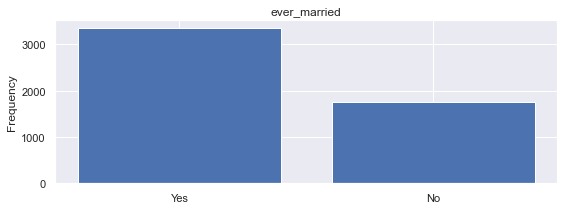

ever_married:
Yes    3353
No     1757
Name: ever_married, dtype: int64


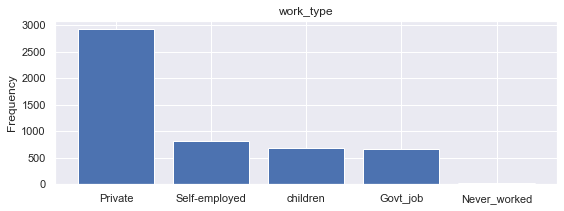

work_type:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


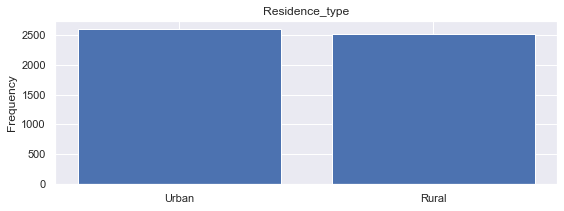

Residence_type:
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


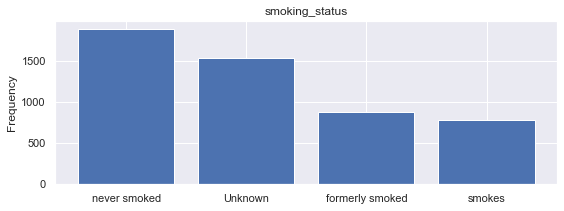

smoking_status:
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [9]:
sns.set_style('darkgrid')
categorical_variables = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for c in categorical_variables:
    bar_plot(c)

<AxesSubplot:xlabel='ever_married', ylabel='stroke'>

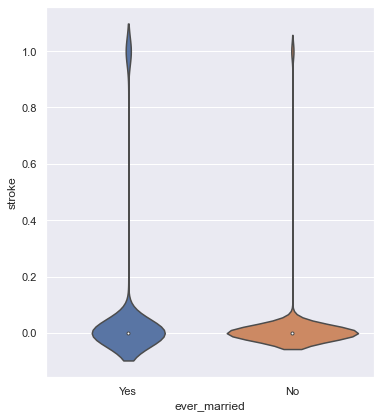

In [10]:
plt.figure(figsize=(20,15))
sns.set_theme(style="darkgrid")
plt.subplot(2,3,1)
sns.violinplot(x = 'ever_married', y = 'stroke', data = dataset)


<a id="6"></a> 
### Numerical Variables

In [11]:
numerical_int64 = (dataset.dtypes == "int64")
numerical_int64_list = list(numerical_int64[numerical_int64].index)

print("Categorical variables:")
print(numerical_int64_list)

Categorical variables:
['hypertension', 'heart_disease', 'stroke']


In [12]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(dataset[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

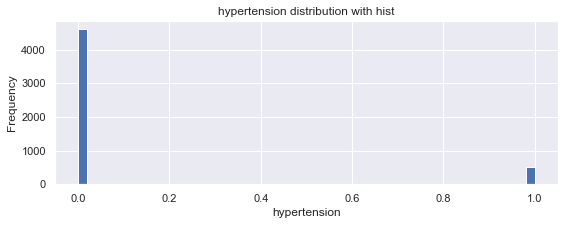

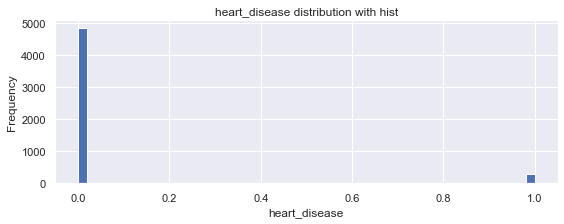

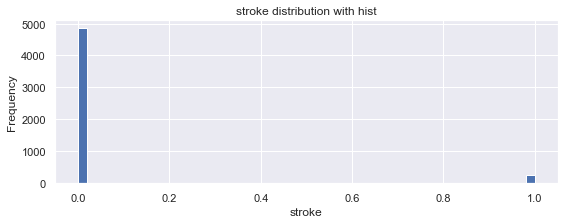

In [13]:
numerical_variables = ['hypertension', 'heart_disease', 'stroke']
for n in numerical_variables:
    plot_hist(n)

In [14]:
numerical_float64 = (dataset.dtypes == "float64")
numerical_float64_list = list(numerical_float64[numerical_float64].index)

print("Numerical variables:")
print(numerical_float64_list)

Numerical variables:
['age', 'avg_glucose_level', 'bmi']


In [15]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(dataset[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribution with Histogram".format(variable))
    plt.show()

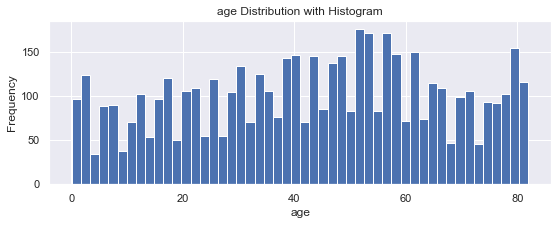

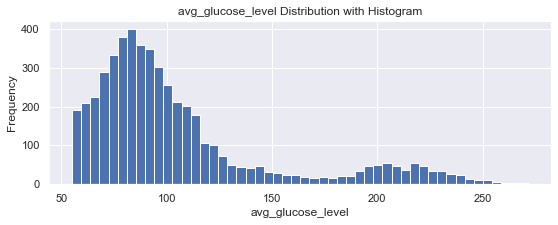

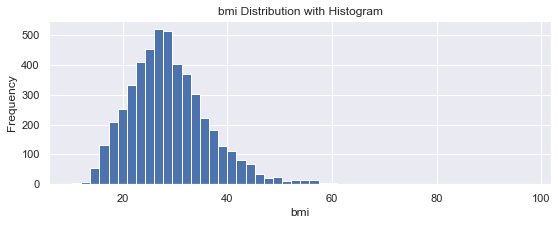

In [16]:
numerical_variables = ['age', 'avg_glucose_level', 'bmi']
for n in numerical_variables:
    plot_hist(n)

Text(0.5, 1.0, 'avg_glucose_level Interval and Counts')

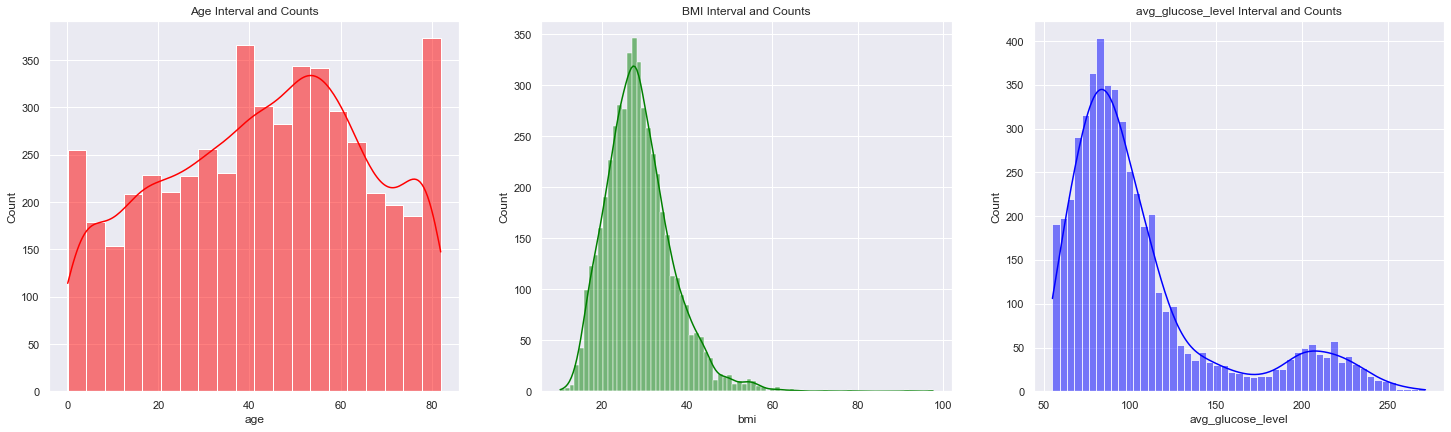

In [17]:
plt.figure(figsize=(25,15))

plt.subplot(2,3,1)
sns.histplot(dataset['age'], color = 'red', kde = True).set_title('Age Interval and Counts')

plt.subplot(2,3,2)
sns.histplot(dataset['bmi'], color = 'green', kde = True).set_title('BMI Interval and Counts')

plt.subplot(2,3,3)
sns.histplot(dataset['avg_glucose_level'], kde = True, color = 'blue').set_title('avg_glucose_level Interval and Counts')


Text(0.5, 1.0, 'Stroke Interval and Counts')

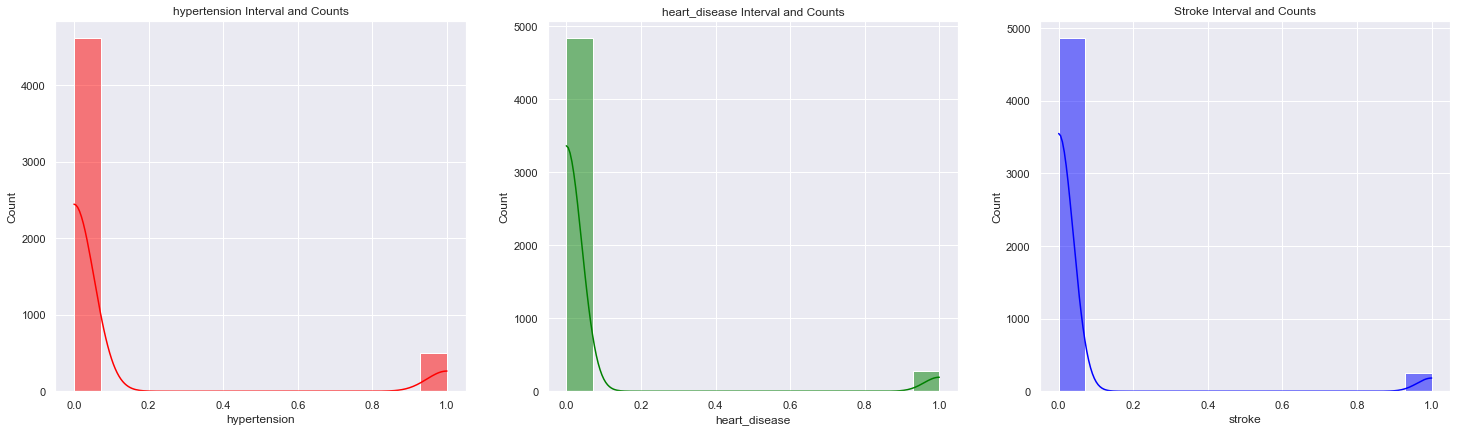

In [18]:
plt.figure(figsize=(25,15))

plt.subplot(2,3,1)
sns.histplot(dataset['hypertension'], color = 'red', kde = True).set_title('hypertension Interval and Counts')

plt.subplot(2,3,2)
sns.histplot(dataset['heart_disease'], color = 'green', kde = True).set_title('heart_disease Interval and Counts')

plt.subplot(2,3,3)
sns.histplot(dataset['stroke'], kde = True, color = 'blue').set_title('Stroke Interval and Counts')

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

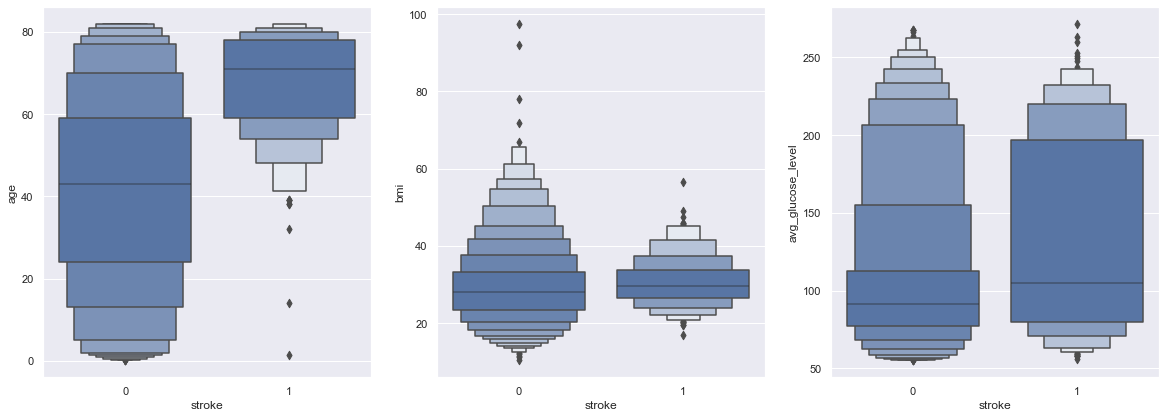

In [19]:
import seaborn as sns
sns.set_theme(style="darkgrid")


plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.boxenplot(x=dataset['stroke'], y=dataset['age'],
              color="b", 
              scale="linear", data=dataset)

plt.subplot(2,3,2)
sns.boxenplot(x=dataset['stroke'], y=dataset['bmi'],
              color="b", 
              scale="linear", data=dataset)

plt.subplot(2,3,3)
sns.boxenplot(x=dataset['stroke'], y=dataset['avg_glucose_level'],
              color="b", 
              scale="linear", data=dataset)

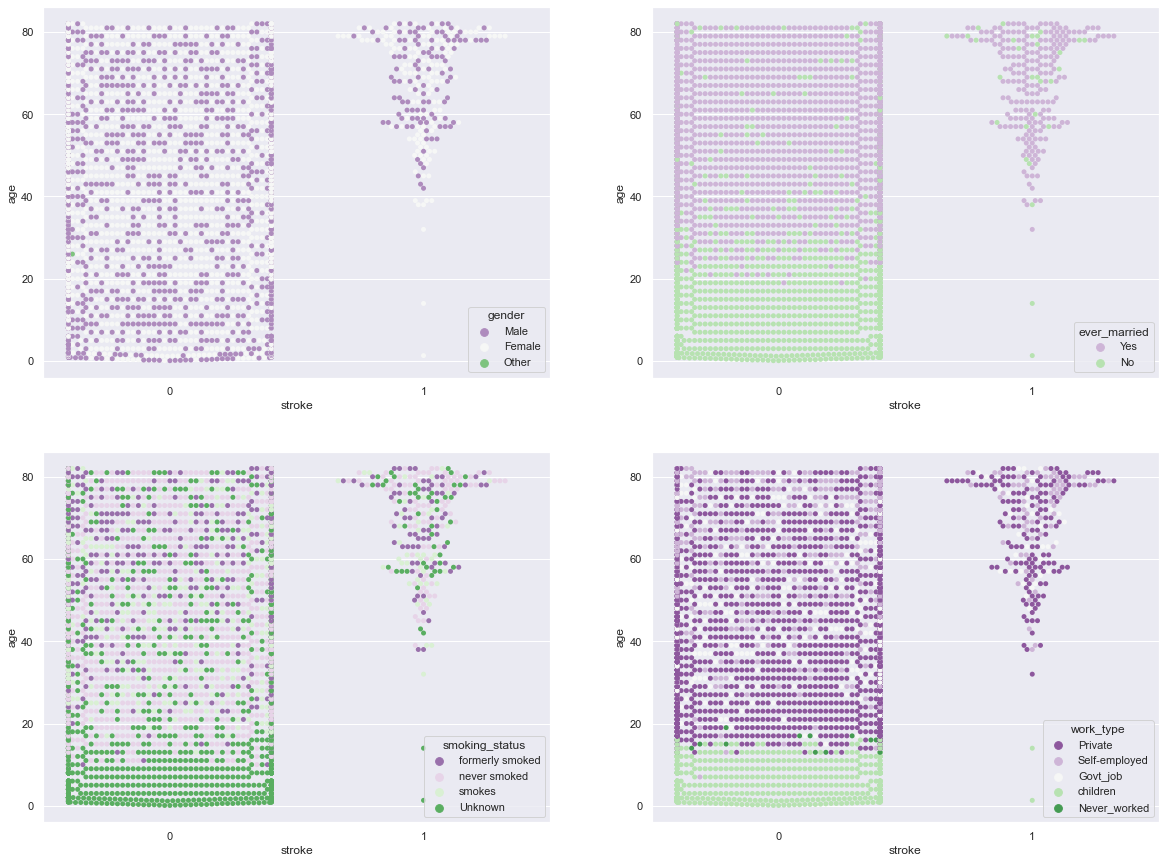

In [20]:
import seaborn as sns
sns.set_theme(style="darkgrid")

plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.swarmplot(x="stroke", y="age",hue="gender", data=dataset, palette="PRGn")

plt.subplot(2,2,2)
sns.swarmplot(x="stroke", y="age",hue="ever_married", data=dataset, palette="PRGn")

plt.subplot(2,2,3)
sns.swarmplot(x="stroke", y="age",hue="smoking_status", data=dataset, palette="PRGn")

plt.subplot(2,2,4)
sns.swarmplot(x="stroke", y="age",hue="work_type", data=dataset, palette="PRGn")

plt.show()

---

# 2. Basic Data Analysis

<a id="8"></a> 
## Gender - Stroke

#### Average stroke rate by gender. Male's stroke rate is higher.

In [21]:
dataset[["gender","stroke"]].groupby(["gender"], as_index = False).mean().sort_values(by="stroke",ascending = False)

gender    stroke
1    Male  0.051064
0  Female  0.047094
2   Other  0.000000

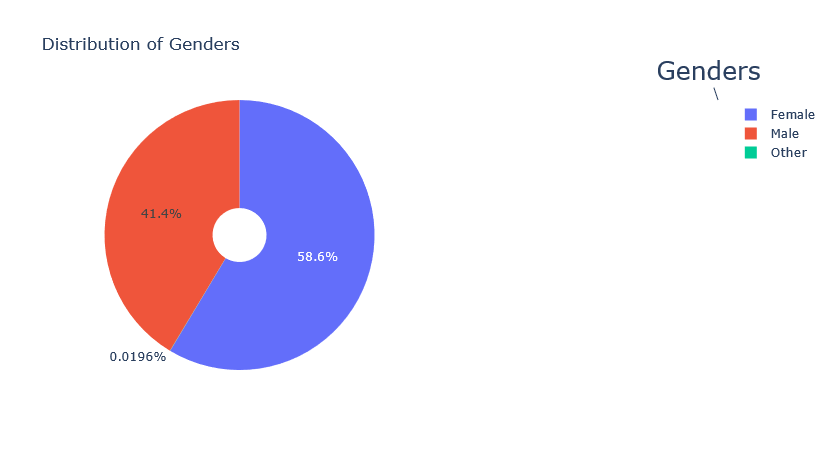

In [22]:
df = dataset

labels = dataset['gender'].value_counts().index
pie1 = dataset['gender'].value_counts().values
# figure
fig = {
  "data": [
    {
      "values": pie1,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "",
      "hoverinfo":"label+percent+name+value",
      "hole": .2,
      "type": "pie"
    },],
  "layout": {
        "title":"Distribution of Genders",
        "annotations": [
            { "font": { "size": 25},
              "showarrow": True,
              "text": "Genders",
                "x": 1,
                "y": 1,
            },
        ]
    }
}
iplot(fig)
# plotly was not working in my system, so I made the pie using plt.

# plt.figure(figsize = (8,8))
# plt.pie(pie1, labels=labels, autopct='%1.1f%%')
# plt.title("Distribution of Genders",color = 'black',fontsize = 15)

<a id="9"></a> 
## Ever Married - Stroke

#### stroke rate based on married or not

In [23]:
dataset[["ever_married","stroke"]].groupby(["ever_married"], as_index = False).mean().sort_values(by="stroke",ascending = False)

ever_married    stroke
1          Yes  0.065613
0           No  0.016505

Text(0.5, 1.0, "Distribution of Samples by 'ever_married'")

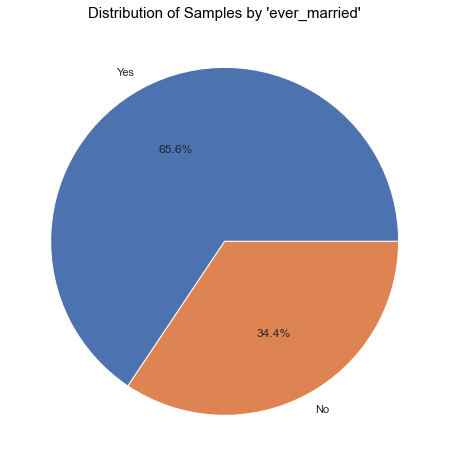

In [24]:
labels = dataset['ever_married'].value_counts().index
sizes = dataset['ever_married'].value_counts().values

plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Distribution of Samples by 'ever_married'",color = 'black',fontsize = 15)

<a id="10"></a> 
## Work Type - Stroke

#### stroke rate based on work_type

In [25]:
dataset[["work_type","stroke"]].groupby(["work_type"], as_index = False).mean().sort_values(by="stroke",ascending = False)

work_type    stroke
3  Self-employed  0.079365
2        Private  0.050940
0       Govt_job  0.050228
4       children  0.002911
1   Never_worked  0.000000

In [26]:
dataset[["work_type","stroke"]].groupby(["work_type"], as_index = False).count().sort_values(by="stroke",ascending = False)

work_type  stroke
2        Private    2925
3  Self-employed     819
4       children     687
0       Govt_job     657
1   Never_worked      22

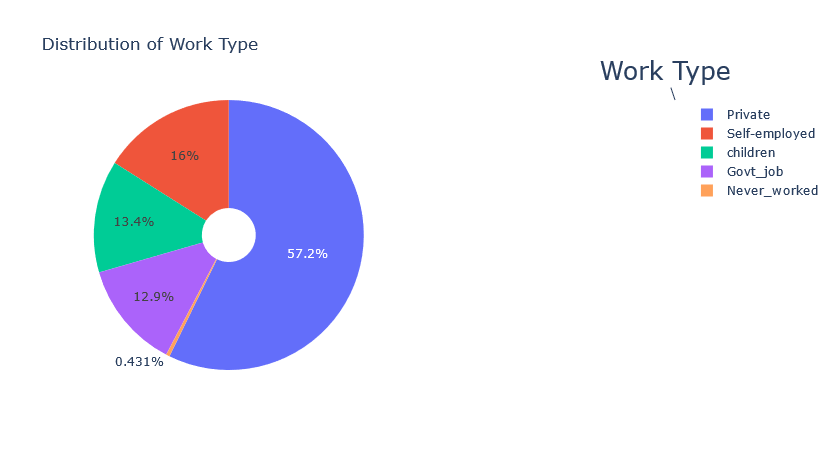

In [27]:
df = dataset

labels = dataset['work_type'].value_counts().index
pie1 = dataset['work_type'].value_counts().values
# figure
fig = {
  "data": [
    {
      "values": pie1,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "",
      "hoverinfo":"label+percent+name+value",
      "hole": .2,
      "type": "pie",
    },],
  "layout": {
        "title":"Distribution of Work Type",
        "annotations": [
            { "font": { "size": 25},
              "showarrow": True,
              "text": "Work Type",
                "x": 1,
                "y": 1,
             
            },
        ]
    }
}
iplot(fig)

# plt.figure(figsize = (8,8))
# plt.pie(pie1, labels=labels, autopct='%1.1f%%')
# plt.title("Distribution of Work Types",color = 'black',fontsize = 15)

<a id="11"></a> 
## Residence_type - Stroke

#### stroke rate based on residence type.

In [28]:
dataset[["Residence_type","stroke"]].groupby(["Residence_type"], as_index = False).mean().sort_values(by="stroke",ascending = False)

Residence_type    stroke
1          Urban  0.052003
0          Rural  0.045346

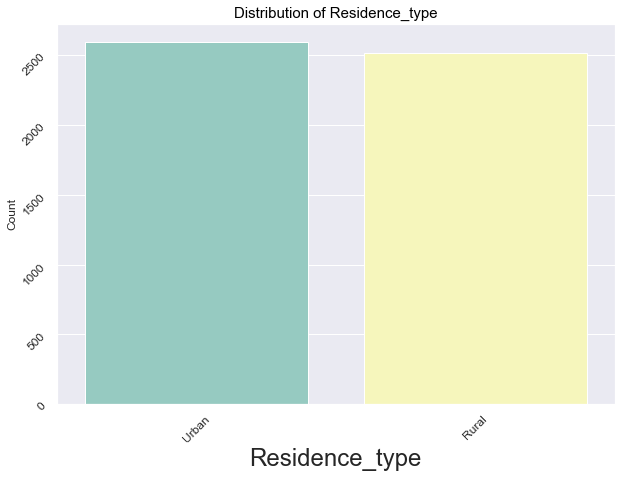

In [29]:
counts = dataset['Residence_type'].value_counts()

plt.figure(figsize=(10,7))
sns.barplot(x=counts.index, y=counts.values, palette="Set3")

plt.ylabel('Count')
plt.xlabel('Residence_type', style = 'normal', size = 24)

plt.xticks(rotation = 45, size = 12)
plt.yticks(rotation = 45, size = 12)

plt.title('Distribution of Residence_type',color = 'black',fontsize=15)
plt.show()

<a id="12"></a> 
## smoking_status - Stroke

In [30]:
dataset[["smoking_status","stroke"]].groupby(["smoking_status"], as_index = False).mean().sort_values(by="stroke",ascending = False)

smoking_status    stroke
1  formerly smoked  0.079096
3           smokes  0.053232
2     never smoked  0.047569
0          Unknown  0.030440

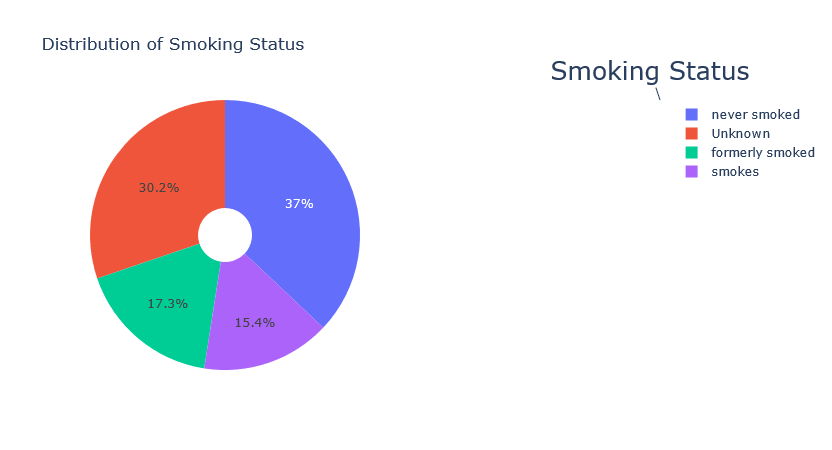

In [31]:
df = dataset

labels = dataset['smoking_status'].value_counts().index
pie1 = dataset['smoking_status'].value_counts().values
# figure
fig = {
  "data": [
    {
      "values": pie1,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "",
      "hoverinfo":"label+percent+name+value",
      "hole": .2,
      "type": "pie",
    },],
  "layout": {
        "title":"Distribution of Smoking Status",
        "annotations": [
            { "font": { "size": 25},
              "showarrow": True,
              "text": "Smoking Status",
                "x": 1,
                "y": 1,
             
            },
        ]
    }
}
iplot(fig)

# plt.figure(figsize = (8,8))
# plt.pie(pie1, labels=labels, autopct='%1.1f%%')
# plt.title("Distribution of Smoking Status",color = 'black',fontsize = 15)

---

<a id="13"></a> 
# 3. Pandas Profiling

#### Pandas profiling is a useful library that generates interactive reports about the data. With using this library, we can see types of data, distribution of data and various statistical information. This tool has many features for data preparing. Pandas Profiling includes graphics about specific feature and correlation maps too. You can see more details about this tool in the following url: https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/

In [32]:
import pandas_profiling as pp
pp.ProfileReport(dataset)

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---

<a id="14"></a> 
# 4. Correlation

#### Correlation explains how one or more variables are related to each other. These variables can be input data features which have been used to forecast our target variable.
https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

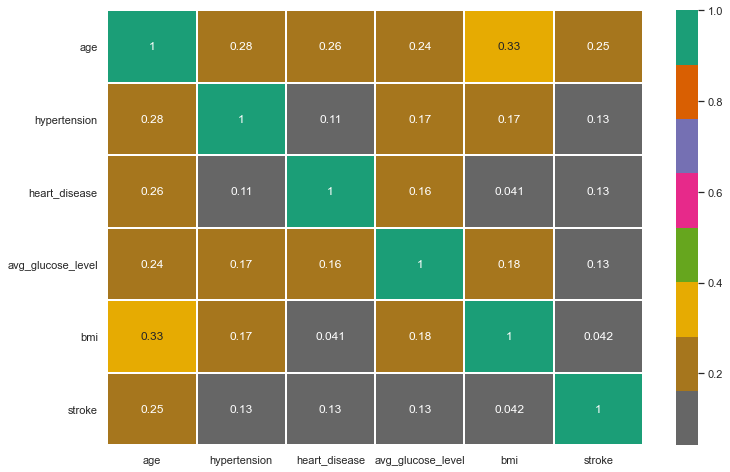

In [33]:
plt.figure(figsize=(12,8)) 
sns.heatmap(dataset.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

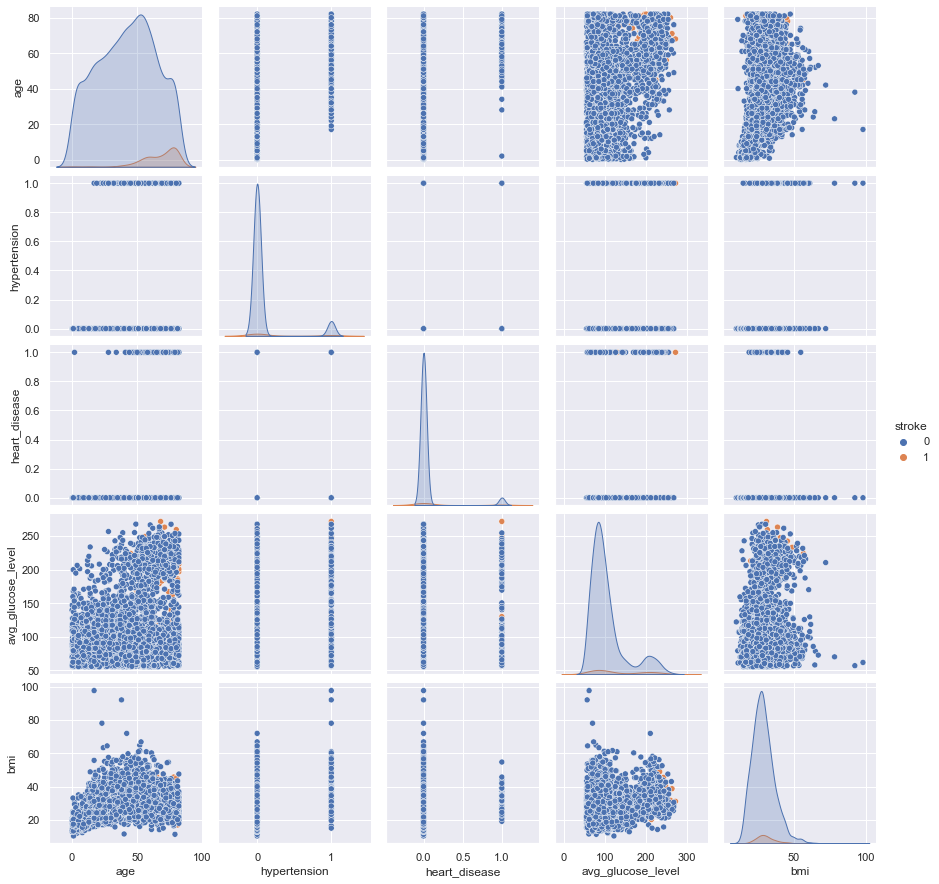

In [34]:
sns.pairplot(dataset, hue = 'stroke')

---

<a id="15"></a> 
# 5. Anomaly Detection

#### Anomaly is one that differs / deviates significantly from other observations in the same sample. An anomaly detection pattern produces two different results. The first is a categorical tag for whether the observation is abnormal or not; the second is a score or trust value. Score carries more information than the label. Because it also tells us how abnormal the observation is. The tag just tells you if it's abnormal. While labeling is more common in supervised methods, the score is more common in unsupervised and semisupervised methods.

In [35]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [36]:
dataset.loc[detect_outliers(dataset,['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke'])]

gender   age  hypertension  heart_disease ever_married      work_type  \
0      Male  67.0             0              1          Yes        Private   
4    Female  79.0             1              0          Yes  Self-employed   
13     Male  78.0             0              1          Yes        Private   
14   Female  79.0             0              1          Yes        Private   
16     Male  64.0             0              1          Yes        Private   
..      ...   ...           ...            ...          ...            ...   
6      Male  74.0             1              1          Yes        Private   
35   Female  82.0             1              1           No        Private   
143  Female  69.0             1              1           No  Self-employed   
171  Female  79.0             1              1           No  Self-employed   
184    Male  61.0             1              1          Yes        Private   

    Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0            Urban             228.69  36.6  formerly smoked       1  
4            Rural             174.12  24.0     never smoked       1  
13           Urban             219.84   NaN          Unknown       1  
14           Urban             214.09  28.2     never smoked       1  
16           Urban             191.61  37.5           smokes       1  
..             ...                ...   ...              ...     ...  
6            Rural              70.09  27.4     never smoked       1  
35           Rural              84.03  26.5  formerly smoked       1  
143          Urban              72.17  36.8     never smoked       1  
171          Rural              60.94   NaN     never smoked       1  
184          Urban             112.24  37.4           smokes       1  

[75 rows x 11 columns]

In [37]:
# drop outliers
dataset = dataset.drop(detect_outliers(dataset,['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']),axis = 0).reset_index(drop = True)

In [38]:
dataset

gender   age  hypertension  heart_disease ever_married      work_type  \
0     Female  61.0             0              0          Yes  Self-employed   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3       Male  81.0             0              0          Yes        Private   
4     Female  69.0             0              0           No        Private   
...      ...   ...           ...            ...          ...            ...   
5030  Female  80.0             1              0          Yes        Private   
5031  Female  81.0             0              0          Yes  Self-employed   
5032  Female  35.0             0              0          Yes  Self-employed   
5033    Male  51.0             0              0          Yes        Private   
5034  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0             Rural             202.21   NaN     never smoked       1  
1             Rural             105.92  32.5     never smoked       1  
2             Urban             171.23  34.4           smokes       1  
3             Urban             186.21  29.0  formerly smoked       1  
4             Urban              94.39  22.8     never smoked       1  
...             ...                ...   ...              ...     ...  
5030          Urban              83.75   NaN     never smoked       0  
5031          Urban             125.20  40.0     never smoked       0  
5032          Rural              82.99  30.6     never smoked       0  
5033          Rural             166.29  25.6  formerly smoked       0  
5034          Urban              85.28  26.2          Unknown       0  

[5035 rows x 11 columns]

---

<a id="16"></a> 
# 6. Missing Values

#### We have 201 null values in total. bmi includes all. (After Anomaly Detection, it decreases to 192)

<a id="17"></a> 
## bmi

In [39]:
dataset[dataset['bmi'].isnull()]

gender   age  hypertension  heart_disease ever_married      work_type  \
0     Female  61.0             0              0          Yes  Self-employed   
5     Female  59.0             0              0          Yes        Private   
17      Male  58.0             0              0          Yes        Private   
18      Male  59.0             0              0          Yes        Private   
28    Female  63.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4964    Male  41.0             0              0           No        Private   
4973    Male  40.0             0              0          Yes        Private   
5018  Female  45.0             1              0          Yes       Govt_job   
5024    Male  40.0             0              0          Yes        Private   
5030  Female  80.0             1              0          Yes        Private   

     Residence_type  avg_glucose_level  bmi   smoking_status  stroke  
0             Rural             202.21  NaN     never smoked       1  
5             Rural              76.15  NaN          Unknown       1  
17            Rural             189.84  NaN          Unknown       1  
18            Rural             211.78  NaN  formerly smoked       1  
28            Urban              90.90  NaN  formerly smoked       1  
...             ...                ...  ...              ...     ...  
4964          Rural              70.15  NaN  formerly smoked       0  
4973          Urban             191.15  NaN           smokes       0  
5018          Rural              95.02  NaN           smokes       0  
5024          Rural              83.94  NaN           smokes       0  
5030          Urban              83.75  NaN     never smoked       0  

[192 rows x 11 columns]

***How can we handle null values?***

* We have selected the differences for BMI will be between gender.

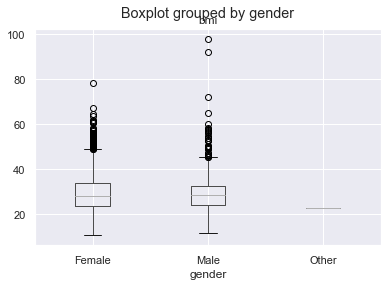

In [40]:
dataset.boxplot(column="bmi",by = "gender")
plt.show()

#### We get different BMI averages for women and men, although not very large. I will assign the total BMI mean as there are very few examples for the Others gender.

In [41]:
print("Mean of BMI value for Females: ", np.mean(dataset[dataset['gender'] == 'Female']['bmi']))
print("Mean of BMI value for Males: ", np.mean(dataset[dataset['gender'] == 'Male']['bmi']))
print("Mean of BMI value for Others: ", np.mean(dataset['bmi']))

Mean of BMI value for Females:  29.035926055109936
Mean of BMI value for Males:  28.594683544303823
Mean of BMI value for Others:  28.854614908114797


#### I filled null values with 0.

In [42]:
dataset['bmi'] = dataset['bmi'].fillna(0)

In [43]:
for i in range(0,5035):
    if(dataset['bmi'][i] == 0):
        if(dataset['gender'][i] == 'Male'):
            dataset['bmi'][i] = 28.594683544303823
        elif(dataset['gender'][i] == 'Female'):
            dataset['bmi'][i] = 29.035926055109936
        else:
            dataset['bmi'][i] = 28.854652338161664

In [44]:
#testing null values in any attributes now
dataset[dataset['bmi'].isnull()]

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []

---

<a id="18"></a> 
# 7. Encoding

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#### First, we will handle Categorical Values.

In [46]:
print("Unique Values for Gender", dataset['gender'].unique())
print("Unique Values for ever_married", dataset['ever_married'].unique())
print("Unique Values for work_type", dataset['work_type'].unique())
print("Unique Values for Residence_type", dataset['Residence_type'].unique())
print("Unique Values for smoking_status", dataset['smoking_status'].unique())

Unique Values for Gender ['Female' 'Male' 'Other']
Unique Values for ever_married ['Yes' 'No']
Unique Values for work_type ['Self-employed' 'Private' 'Govt_job' 'children' 'Never_worked']
Unique Values for Residence_type ['Rural' 'Urban']
Unique Values for smoking_status ['never smoked' 'smokes' 'formerly smoked' 'Unknown']


<a id="19"></a> 
## Label Encoding

#### Label Encoding is an encoding technique for handling categorical variables. In this technique, each data is assigned a unique integer.

In [47]:
ever_married_mapping = {'No': 0, 'Yes': 1}
dataset['ever_married'] = dataset['ever_married'].map(ever_married_mapping)

In [48]:
Residence_type_mapping = {'Rural': 0, 'Urban': 1}
dataset['Residence_type'] = dataset['Residence_type'].map(Residence_type_mapping)

<a id="20"></a> 
## One-Hot Encoding

#### One Hot Encoding is the binary representation of categorical variables. This process requires categorical values to be mapped to integer values first. Next, each integer value is represented as a binary vector with all values zero except the integer index marked with 1.

#### One Hot Encoding makes the representation of categorical data more expressive and easy. Many machine learning algorithms cannot work directly with categorical data, so categories must be converted to numbers. This operation is required for input and output variables that are categorical.

#### In this part, we converted categorical datas to the binary values. This operation increases the accuracy.


In [49]:
onehotencoder = OneHotEncoder()

In [50]:
dataset['gender'] = pd.Categorical(dataset['gender'])
datasetDummies_gender = pd.get_dummies(dataset['gender'], prefix = 'gender_encoded')
datasetDummies_gender

gender_encoded_Female  gender_encoded_Male  gender_encoded_Other
0                         1                    0                     0
1                         0                    1                     0
2                         1                    0                     0
3                         0                    1                     0
4                         1                    0                     0
...                     ...                  ...                   ...
5030                      1                    0                     0
5031                      1                    0                     0
5032                      1                    0                     0
5033                      0                    1                     0
5034                      1                    0                     0

[5035 rows x 3 columns]

In [51]:
dataset['work_type'] = pd.Categorical(dataset['work_type'])
datasetDummies_work_type = pd.get_dummies(dataset['work_type'], prefix = 'work_type_encoded')
datasetDummies_work_type

work_type_encoded_Govt_job  work_type_encoded_Never_worked  \
0                              0                               0   
1                              0                               0   
2                              0                               0   
3                              0                               0   
4                              0                               0   
...                          ...                             ...   
5030                           0                               0   
5031                           0                               0   
5032                           0                               0   
5033                           0                               0   
5034                           1                               0   

      work_type_encoded_Private  work_type_encoded_Self-employed  \
0                             0                                1   
1                             1                                0   
2                             1                                0   
3                             1                                0   
4                             1                                0   
...                         ...                              ...   
5030                          1                                0   
5031                          0                                1   
5032                          0                                1   
5033                          1                                0   
5034                          0                                0   

      work_type_encoded_children  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  
...                          ...  
5030                           0  
5031                           0  
5032                           0  
5033                           0  
5034                           0  

[5035 rows x 5 columns]

In [52]:
dataset['smoking_status'] = pd.Categorical(dataset['smoking_status'])
datasetDummies_smoking_status = pd.get_dummies(dataset['smoking_status'], prefix = 'smoking_status_encoded')
datasetDummies_smoking_status

smoking_status_encoded_Unknown  smoking_status_encoded_formerly smoked  \
0                                  0                                       0   
1                                  0                                       0   
2                                  0                                       0   
3                                  0                                       1   
4                                  0                                       0   
...                              ...                                     ...   
5030                               0                                       0   
5031                               0                                       0   
5032                               0                                       0   
5033                               0                                       1   
5034                               1                                       0   

      smoking_status_encoded_never smoked  smoking_status_encoded_smokes  
0                                       1                              0  
1                                       1                              0  
2                                       0                              1  
3                                       0                              0  
4                                       1                              0  
...                                   ...                            ...  
5030                                    1                              0  
5031                                    1                              0  
5032                                    1                              0  
5033                                    0                              0  
5034                                    0                              0  

[5035 rows x 4 columns]

In [53]:
dataset.drop("gender", axis=1, inplace=True)
dataset.drop("work_type", axis=1, inplace=True)
dataset.drop("smoking_status", axis=1, inplace=True)

In [54]:
dataset = pd.concat([dataset, datasetDummies_gender], axis=1)
dataset = pd.concat([dataset, datasetDummies_work_type], axis=1)
dataset = pd.concat([dataset, datasetDummies_smoking_status], axis=1)
dataset

age  hypertension  heart_disease  ever_married  Residence_type  \
0     61.0             0              0             1               0   
1     80.0             0              1             1               0   
2     49.0             0              0             1               1   
3     81.0             0              0             1               1   
4     69.0             0              0             0               1   
...    ...           ...            ...           ...             ...   
5030  80.0             1              0             1               1   
5031  81.0             0              0             1               1   
5032  35.0             0              0             1               0   
5033  51.0             0              0             1               0   
5034  44.0             0              0             1               1   

      avg_glucose_level        bmi  stroke  gender_encoded_Female  \
0                202.21  29.035926       1                      1   
1                105.92  32.500000       1                      0   
2                171.23  34.400000       1                      1   
3                186.21  29.000000       1                      0   
4                 94.39  22.800000       1                      1   
...                 ...        ...     ...                    ...   
5030              83.75  29.035926       0                      1   
5031             125.20  40.000000       0                      1   
5032              82.99  30.600000       0                      1   
5033             166.29  25.600000       0                      0   
5034              85.28  26.200000       0                      1   

      gender_encoded_Male  gender_encoded_Other  work_type_encoded_Govt_job  \
0                       0                     0                           0   
1                       1                     0                           0   
2                       0                     0                           0   
3                       1                     0                           0   
4                       0                     0                           0   
...                   ...                   ...                         ...   
5030                    0                     0                           0   
5031                    0                     0                           0   
5032                    0                     0                           0   
5033                    1                     0                           0   
5034                    0                     0                           1   

      work_type_encoded_Never_worked  work_type_encoded_Private  \
0                                  0                          0   
1                                  0                          1   
2                                  0                          1   
3                                  0                          1   
4                                  0                          1   
...                              ...                        ...   
5030                               0                          1   
5031                               0                          0   
5032                               0                          0   
5033                               0                          1   
5034                               0                          0   

      work_type_encoded_Self-employed  work_type_encoded_children  \
0                                   1                           0   
1                                   0                           0   
2                                   0                           0   
3                                   0                           0   
4                                   0                           0   
...                               ...                         ...   
5030                                0                           

#### **Now, we don't have categorical variables. Dataset is ready for Machine Leraning algorithms.**

---

<a id="21"></a> 
# 8. Train - Test Split

In [55]:
features = ['age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'gender_encoded_Female',
 'gender_encoded_Male',
 'gender_encoded_Other',
 'work_type_encoded_Govt_job',
 'work_type_encoded_Never_worked',
 'work_type_encoded_Private',
 'work_type_encoded_Self-employed',
 'work_type_encoded_children',
 'smoking_status_encoded_Unknown',
 'smoking_status_encoded_formerly smoked',
 'smoking_status_encoded_never smoked',
 'smoking_status_encoded_smokes']

label = ['stroke']

X = dataset[features]
y = dataset[label]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=23)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 5035
Total # of sample in train dataset: 4028
Total # of sample in validation dataset: 503
Total # of sample in test dataset: 504


#### Standardization is a method in which the mean value is 0 and the standard deviation is 1, and the distribution approaches the normal. The formula is as follows, we subtract the average value from the value we have, then divide it by the variance value.

In [57]:
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Saving the scaler object

In [58]:
import pickle
import os
scaler_path = os.path.join('C:\\Users\\msn21\\Desktop\\Major Project\\Stroke-Local\\','models\\scaler1.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(sc,scaler_file)

print("Saved scaler object")

Saved scaler object


---

<a id="22"></a> 
# 9. Training & Scores of Models

#### These are the ML algorithms that will apply to dataset. Results will contain train-validation-test scores, confusion matrix, statistical information and classification reports for each algorithm.

In [59]:
models = {
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SupportVectorMachine': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
    'Neural Nets': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1),
}

modelNames = ["GaussianNB", 'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets']

trainScores = []
validationScores = []
testScores = []

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  score = model.score(X_valid, y_valid)
  #print(f'{m} validation score => {score*100}') #not needed
    
  print(f'{m}') 
  train_score = model.score(X_train, y_train)
  print(f'Train score of trained model: {train_score*100}')
  trainScores.append(train_score*100)

  validation_score = model.score(X_valid, y_valid)
  print(f'Validation score of trained model: {validation_score*100}')
  validationScores.append(validation_score*100)

  test_score = model.score(X_test, y_test)
  print(f'Test score of trained model: {test_score*100}')
  testScores.append(test_score*100)
  print(" ")
    
  y_predictions = model.predict(X_test)
  conf_matrix = confusion_matrix(y_predictions, y_test)

  print(f'Confussion Matrix: \n{conf_matrix}\n')

  predictions = model.predict(X_test)
  cm = confusion_matrix(predictions, y_test)

  tn = conf_matrix[0,0]
  fp = conf_matrix[0,1]
  tp = conf_matrix[1,1]
  fn = conf_matrix[1,0]
  accuracy  = (tp + tn) / (tp + fp + tn + fn)
  precision = tp / (tp + fp)
  recall    = tp / (tp + fn)
  f1score  = 2 * precision * recall / (precision + recall)
  specificity = tn / (tn + fp)
  print(f'Accuracy : {accuracy}')
  print(f'Precision: {precision}')
  print(f'Recall   : {recall}')
  print(f'F1 score : {f1score}')
  print(f'Specificity : {specificity}')
  print("") 
  print(f'Classification Report: \n{classification_report(predictions, y_test)}\n')
  print("")

  for m in range (1):
    current = modelNames[m]
    modelNames.remove(modelNames[m])

  preds = model.predict(X_test) 
  confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true' 
#   print(preds) # this list contains 831 values test values predictions by the model
#   print(confusion_matr) #confusion matrix for the test set by that particular model
  print("*********************************************************************************************")
  print("")
  print("")

GaussianNB
Train score of trained model: 18.147964250248265
Validation score of trained model: 96.22266401590457
Test score of trained model: 17.46031746031746
 
Confussion Matrix: 
[[ 68   1]
 [415  20]]

Accuracy : 0.1746031746031746
Precision: 0.9523809523809523
Recall   : 0.04597701149425287
F1 score : 0.08771929824561404
Specificity : 0.9855072463768116

Classification Report: 
              precision    recall  f1-score   support

           0       0.14      0.99      0.25        69
           1       0.95      0.05      0.09       435

    accuracy                           0.17       504
   macro avg       0.55      0.52      0.17       504
weighted avg       0.84      0.17      0.11       504



*********************************************************************************************


BernoulliNB
Train score of trained model: 96.07745779543197
Validation score of trained model: 96.02385685884693
Test score of trained model: 95.83333333333334
 
Confussion Matrix: 
[[483  

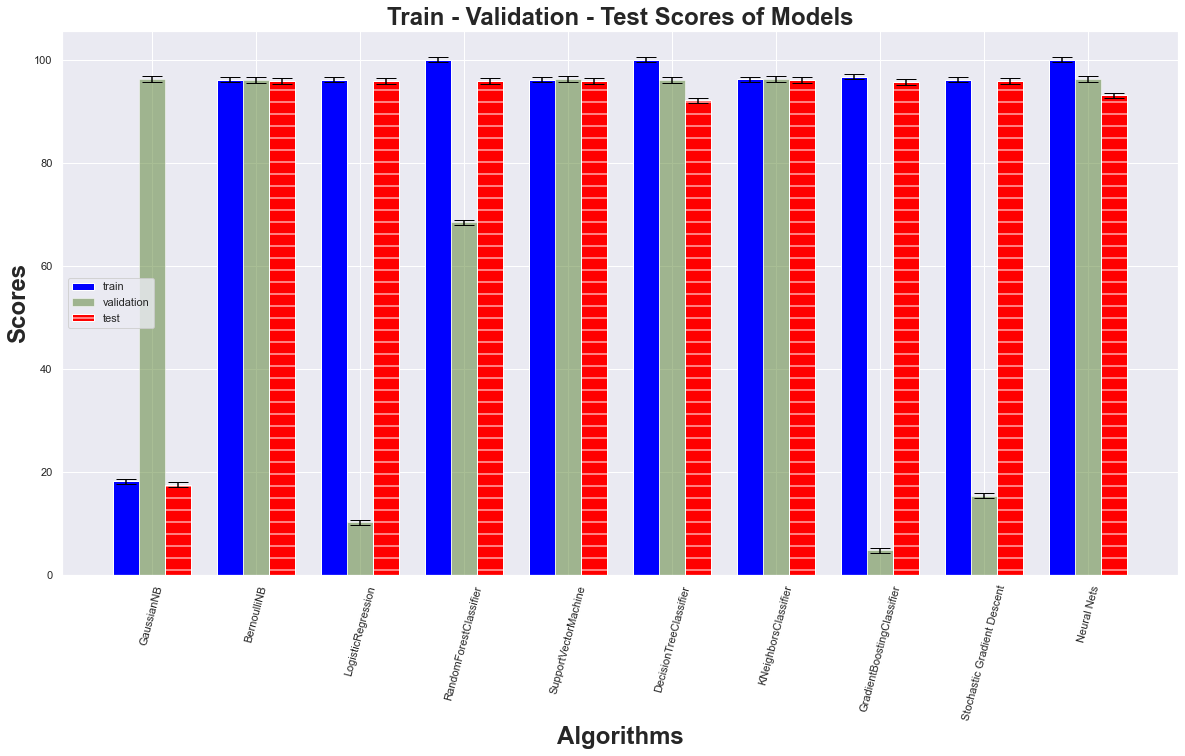

In [60]:
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.title('Train - Validation - Test Scores of Models', fontweight='bold', size = 24)

barWidth = 0.25
 
bars1 = trainScores
bars2 = validationScores
bars3 = testScores
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='train', yerr=0.5,ecolor="black",capsize=10)
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='validation', yerr=0.5,ecolor="black",capsize=10, alpha = .50)
plt.bar(r3, bars3, color='red', width=barWidth, edgecolor='white', label='test', yerr=0.5,ecolor="black",capsize=10, hatch = '-')
 
modelNames = ["GaussianNB", 'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets']
    
plt.xlabel('Algorithms', fontweight='bold', size = 24)
plt.ylabel('Scores', fontweight='bold', size = 24)
plt.xticks([r + barWidth for r in range(len(bars1))], modelNames, rotation = 75)
 
plt.legend()
plt.show()

In [81]:
for i in range(10):
    print(f'Accuracy of {modelNames[i]} -----> {testScores[i]}')

- Accuracy of GaussianNB -----> 18.46031746031746
- Accuracy of BernoulliNB -----> 90.72222222222223
- Accuracy of LogisticRegression -----> 91.8555555555556
- Accuracy of RandomForestClassifier -----> 93.63492063492063
- Accuracy of SupportVectorMachine -----> 92.46031746031746
- Accuracy of DecisionTreeClassifier -----> 92.06349206349206
- Accuracy of KNeighborsClassifier -----> 96.03174603174604
- Accuracy of GradientBoostingClassifier -----> 94.63492063492063
- Accuracy of Stochastic Gradient Descent -----> 94.83333333333334
- Accuracy of Neural Nets -----> 93.05555555555556

#### The Highest is the *"Accuracy of KNeighborsClassifier -----> 96.03174603174604"*

---

<a id="23"></a> 
# 10. Evaluation of Models

#### We evaluated these models according to their accuracies. Best algorithm is KNN with 96.03%. So, we will make k-Fold Cross Validation and Hyper-Parameter Optimization for KNN algorithm.

In [62]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

train_score = knn_model.score(X_train, y_train)
print(f'Train score of trained model: {train_score}')

validation_score = knn_model.score(X_valid, y_valid)
print(f'Validation score of trained model: {validation_score}')

test_score = knn_model.score(X_test, y_test)
print(f'Test score of trained model: {test_score}')

y_predictions = knn_model.predict(X_test)

conf_matrix = confusion_matrix(y_predictions, y_test)


print(f'Accuracy: {accuracy_score(y_predictions, y_test)*100}')
print()
print(f'Confussion matrix: \n{conf_matrix}\n')

Train score of trained model: 0.9617676266137041
Validation score of trained model: 0.9622266401590457
Test score of trained model: 0.9603174603174603
Accuracy: 96.03174603174604

Confussion matrix: 
[[483  20]
 [  0   1]]



## Saving the best model prediction

In [63]:
import joblib
#saving the model**********************************************************************
model_path = os.path.join('C:\\Users\\msn21\\Desktop\\Major Project\\Stroke-Local\\','models\\knn.sav')
#C:\\Users\\msn21\\Desktop\\Major Project\\Stroke
#model_path=os.path.join('D:/Python37/Projects/Stroke Prediction/','models/dt.sav')
joblib.dump(knn_model,model_path)    
print("Saved knn_model") #***************************************************************

Saved knn_model


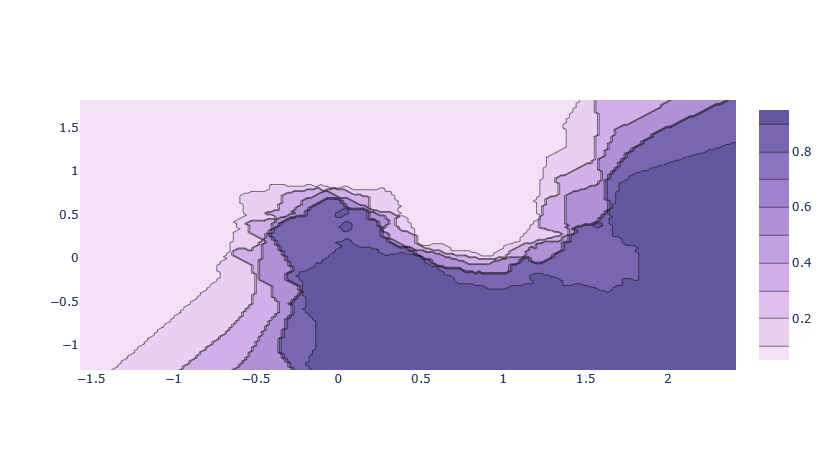

In [64]:
import plotly.graph_objects as go
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

mesh_size = .02
margin = 0.25

# Load and split data
X, y = make_moons(noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y.astype(str), test_size=0.2, random_state=11) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=13)

# Create a mesh grid on which we will run our model
x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Create classifier, run predictions on grid
clf = knn_model
clf.fit(X, y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)


# Plot the figure
fig = go.Figure(data=[
    go.Contour(
        x=xrange,
        y=yrange,
        z=Z,
        colorscale='purp'
    )
])
fig.show()

<a id="24"></a> 
## k-Fold Cross Validation

### Cross Validation will enable us to see whether we are facing an overfitting problem and also to see the quality of our model. Thus, it will enable us to test the performance of our model before encountering high error rates in the test data set that we have not seen yet. It is a method that is frequently used because it is easy to apply.

***cv = 10 means k = 10 for KNN.***

In [65]:
print(cross_val_score(knn_model, X = X_train, y = y_train, cv = 10))

[1.    0.875 1.    1.    1.    0.75  0.875 1.    1.    1.   ]


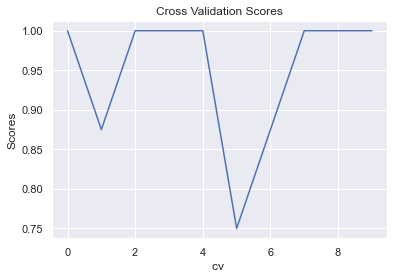

In [66]:
g = cross_val_score(knn_model, X = X_train, y = y_train, cv = 10)
plt.title("Cross Validation Scores")
plt.xlabel("cv ")
plt.ylabel("Scores")
plt.plot(g)

In [67]:
accuracies = cross_val_score(estimator = knn_model, X = X_train, y = y_train, cv = 10)
print("Accuracy (mean):", accuracies.mean()*100, "%")
print("std: ", accuracies.std()*100)

Accuracy (mean): 95.0 %
std:  8.291561975888499


In statistics, mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon. Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, and one technique of measurement versus an alternative technique of measurement. MAE is calculated as: 

Source: https://en.wikipedia.org/wiki/Mean_absolute_error

In [68]:
scores = cross_val_score(knn_model, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 10)
print ("MAE:", scores.mean())

MAE: -0.05


<a id="25"></a> 
## Hyper-Parameter Optimization

#### Unlike parameters, hyperparameters are not learned during training the model. They are determined by the data scientist before the modeling phase. For example, KNN algorithm, which is one of the non-parametric classification algorithms, makes classification by looking at the nearest k neighbors to the desired value. Here, the k number (n_neighbors:) and the distance metric (metric:) to be used are the hyperparameters that should be specified by the data scientist before the modeling, which increases the performance of the model.

**Hyperparameter optimization** is the process of finding the most suitable hyperparameter combination according to the success metric specified for a machine learning algorithm.

#### Given that there are dozens of hyperparameters for a machine learning algorithm and dozens of values these hyperparameters can take, it's clear how difficult it will be to try all combinations one by one and pick the best combination. For this reason, different methods have been developed for hyperparameter optimization. GridSearcCV and RandomizedSearchCV are among these methods.

<a id="26"></a> 
### **GridSearchCV**

#### For the hyperparameters and their values that are desired to be tested in the model, a separate model is established with all combinations and the most successful hyperparameter set is determined according to the specified metric.

In [69]:
parameters = {'n_neighbors': [2,3,5,7,9,11,15,20],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'weights': ['uniform', 'distance'],
             'metric': ['manhattan', 'euclidean', 'minkowski', 'cosine', 'jaccard', 'hamming']
             }

gcv = GridSearchCV(knn_model, parameters, cv=5, verbose = 1, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


In [70]:
print(f'GridSearchView Best Score: {gcv.best_score_*100}')
print(f'GridSearchView Best Estimator: {gcv.best_estimator_}')
print(f'GridSearchView Best Params: {gcv.best_params_}')

GridSearchView Best Score: 95.0
GridSearchView Best Estimator: KNeighborsClassifier(metric='manhattan', n_neighbors=3)
GridSearchView Best Params: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}


<a id="27"></a> 
### **RandomizedSearchCV**

#### A set of hyperparameters is randomly selected and tested by cross-validation and the model set up. These steps continue until the specified calculation time limit or the number of iterations is reached.

In [71]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
params = {'n_neighbors': [2,3,5,7,9,11,15,20],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'weights': ['uniform', 'distance'],
             'metric': ['manhattan', 'euclidean', 'minkowski', 'cosine', 'jaccard', 'hamming']
             }

randomizedcv = RandomizedSearchCV(knn_model, params, n_iter=200, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


In [72]:
print(f'RandomizedSearchCV Best Score: {randomizedcv.best_score_*100}')
print(f'RandomizedSearchCV Best Estimator: {randomizedcv.best_estimator_}')
print(f'RandomizedSearchCV Best Params: {randomizedcv.best_params_}')

RandomizedSearchCV Best Score: 95.0
RandomizedSearchCV Best Estimator: KNeighborsClassifier(algorithm='brute', n_neighbors=7, weights='distance')
RandomizedSearchCV Best Params: {'weights': 'distance', 'n_neighbors': 7, 'metric': 'minkowski', 'algorithm': 'brute'}


---

<a id="28"></a> 
## Best Features Selection

#### Feature Importance and Best Features

In [73]:
# I wrote this part again because X y changed above, in the k-nn visualization. 
features = ['age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'gender_encoded_Female',
 'gender_encoded_Male',
 'gender_encoded_Other',
 'work_type_encoded_Govt_job',
 'work_type_encoded_Never_worked',
 'work_type_encoded_Private',
 'work_type_encoded_Self-employed',
 'work_type_encoded_children',
 'smoking_status_encoded_Unknown',
 'smoking_status_encoded_formerly smoked',
 'smoking_status_encoded_never smoked',
 'smoking_status_encoded_smokes']

label = ['stroke']

X = dataset[features]
y = dataset[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=23)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Total # of sample in whole dataset: 5035
Total # of sample in train dataset: 4028
Total # of sample in validation dataset: 503
Total # of sample in test dataset: 504


RandomForestClassifier
Old Shape: (5035, 19) New shape: (5035, 3)




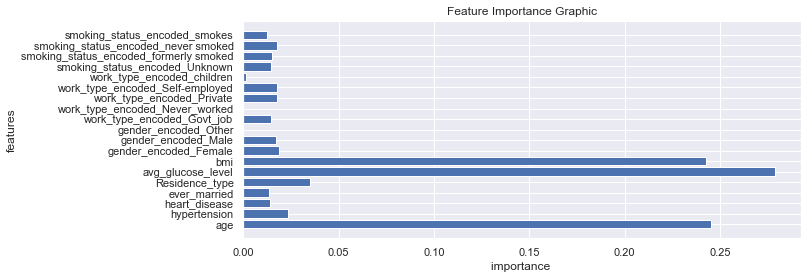

DecisionTreeClassifier
Old Shape: (5035, 19) New shape: (5035, 3)




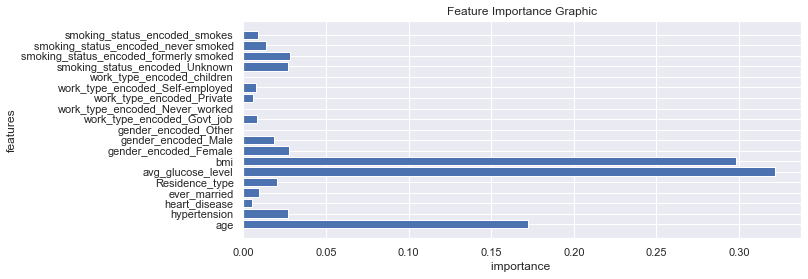

GradientBoostingClassifier
Old Shape: (5035, 19) New shape: (5035, 3)




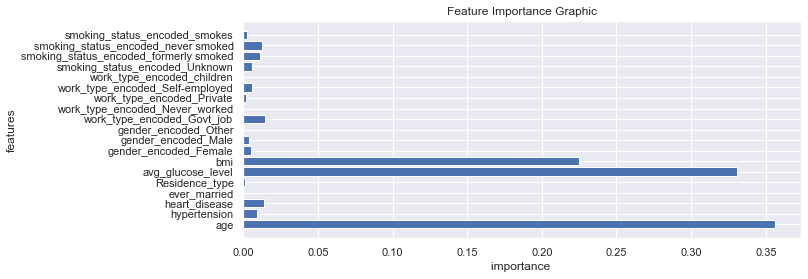

In [74]:
models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
}

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  
  print(f'{m}') 
  best_features = SelectFromModel(model)
  best_features.fit(X, y)

  transformedX = best_features.transform(X)
  print(f"Old Shape: {X.shape} New shape: {transformedX.shape}")
  print("\n")

  imp_feature = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
  plt.figure(figsize=(10,4))
  plt.title("Feature Importance Graphic")
  plt.xlabel("importance ")
  plt.ylabel("features")
  plt.barh(imp_feature['Feature'],imp_feature['Importance'])
  plt.show()

In [75]:
models = {
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
}

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  
  print(f'{m}') 
  best_features = SelectFromModel(model)
  best_features.fit(X, y)

  transformedX = best_features.transform(X)
  print(f"Old Shape: {X.shape} New shape: {transformedX.shape}")
  print("\n")

BernoulliNB
Old Shape: (5035, 19) New shape: (5035, 7)


LogisticRegression
Old Shape: (5035, 19) New shape: (5035, 10)


Stochastic Gradient Descent
Old Shape: (5035, 19) New shape: (5035, 7)




---

<a id="29"></a> 
# Conclusion

In this notebook, We examined Stroke Prediction Dataset. We analyzed the dataset then, tested various ML algorithms for the one with best accuracy. We saved it for using with GUI for providing prediction to the user for chances of stroke to him; based on the data provided by him/her using GUI 

* ***Thank you.***

In [76]:
#6:37